<a href="https://colab.research.google.com/github/MOOwuttichai/Cancer_Social_Listening/blob/main/%E0%B9%80%E0%B9%80%E0%B8%A2%E0%B8%81%E0%B8%A1%E0%B8%B0%E0%B9%80%E0%B8%A3%E0%B9%87%E0%B8%87%2B%E0%B9%80%E0%B8%9E%E0%B8%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install attacut
!pip install pythainlp
!pip install epitran

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (5

In [2]:
import pandas as pd
from google.colab import drive
from attacut import tokenize, Tokenizer
import pythainlp
from pythainlp import sent_tokenize, word_tokenize, Tokenizer
from pythainlp.util import normalize
from pythainlp.corpus.common import thai_words
from collections import OrderedDict
import matplotlib as mpl
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # Ensuring matplotlib recognizes the font
mpl.rc('font', family='TH Sarabun New')

--2024-05-16 05:17:48--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-05-16 05:17:48--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.005s  

2024-05-16 05:17:48 (18.0 MB/s) - ‘t

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Carbon/data/ดึงข้อความFacbook - Sheet1.csv')

In [5]:
data.describe()

,ลำดับที่
count,1374.000000
mean,687.500000
std,396.783946
min,1.000000
25%,344.250000
50%,687.500000
75%,1030.750000
max,1374.000000


In [6]:
data.head(5)

,ลำดับที่,ชื่อ,คำพูดโรค
0,1,Wiraon Chuenchom,ตระกูลทางผมก็มะเร็งทั้งย่า อา แต่ที่เคยคุยกับค...
1,2,Wiraon Chuenchom,จากนั้น กค. จะมีก้อนโผ่ลมา และมีการปวดเลยไปหาห...
2,3,ภาณุภัทร อิ่มใจ,แฟนเป็นมะเร็งต่อมน้ำเหลืองครับ\r\nอาการครับ\r\...
3,4,Paradee Chu,ของเราเป็นมะเร็งกระเพาะปัสสวะ เจอได้จากการตรวจ...
4,5,Paradee Chu,ไม่มีอาการอะไรเลย เป็นคนสุขภาพแข็งแรง กินได้ น...


In [7]:
data.iloc[0,1]

'Wiraon Chuenchom'

In [8]:
data[data['ชื่อ']==data.iloc[1,1]]

,ลำดับที่,ชื่อ,คำพูดโรค
0,1,Wiraon Chuenchom,ตระกูลทางผมก็มะเร็งทั้งย่า อา แต่ที่เคยคุยกับค...
1,2,Wiraon Chuenchom,จากนั้น กค. จะมีก้อนโผ่ลมา และมีการปวดเลยไปหาห...


In [9]:
comment=data.groupby('ชื่อ').sum().reset_index()

In [10]:
comment[comment['ชื่อ']=='Wiraon Chuenchom']

,ชื่อ,ลำดับที่,คำพูดโรค
839,Wiraon Chuenchom,3,ตระกูลทางผมก็มะเร็งทั้งย่า อา แต่ที่เคยคุยกับค...


In [11]:
text = comment['คำพูดโรค'][1]

In [12]:
text

'ปี62 แม่เกร็ดเลือดต่ำ+ค่าตับผิดปกติ ตรวจพบไวรัสตับอักเสบซี และมีตับแข็ง ใช้สิทธิ์เบิกได้ข้าราชการ รักษาที่รพ.ศิริราช ทานยาครบ3เดือน จนค่าไวรัสอยู่ในเกณฑ์ปกติ F/U + U/S ทุกๆ6เดือน จนช่วงโควิด Loss F/U ไปอีกที ปี64 U/S พบ HCC stage3 ได้ทำ TACE 5 ครั้ง + RFA 2 ครั้ง จนหายปกติ ตอนนี้ มีนัดทุก6เดือนติดตามอาการคะ'

In [13]:
words = set(thai_words())
name =['กระเพาะปัสสวะ','กระเพาะปัสสาวะ','เยื่อบุโพรงมดลูก','ปากมดลูก','เม็ดเลือดขาว','กระเพาะอาหาร','กระเพราะอาหาร','ต่อมไทรอยด์','ต่อมไทยรอยด์','ท่อน้ำดี']
for i in name:
  words.add(i)
custom_tokenizer = Tokenizer(words)
Token = custom_tokenizer.word_tokenize(normalize(text))

In [14]:
Token

['ปี',
 '62',
 ' ',
 'แม่',
 'เกร็ด',
 'เลือด',
 'ต่ำ',
 '+',
 'ค่า',
 'ตับ',
 'ผิดปกติ',
 ' ',
 'ตรวจ',
 'พบ',
 'ไวรัส',
 'ตับอักเสบ',
 'ซี',
 ' ',
 'และ',
 'มี',
 'ตับแข็ง',
 ' ',
 'ใช้',
 'สิทธิ์',
 'เบิก',
 'ได้',
 'ข้าราชการ',
 ' ',
 'รักษา',
 'ที่',
 'รพ.',
 'ศิริราช',
 ' ',
 'ทาน',
 'ยา',
 'ครบ',
 '3',
 'เดือน',
 ' ',
 'จน',
 'ค่า',
 'ไวรัส',
 'อยู่ในเกณฑ์',
 'ปกติ',
 ' ',
 'F',
 '/U',
 ' ',
 '+',
 ' ',
 'U',
 '/S',
 ' ',
 'ทุกๆ',
 '6',
 'เดือน',
 ' ',
 'จน',
 'ช่วง',
 'โควิด',
 ' ',
 'Loss',
 ' ',
 'F',
 '/U',
 ' ',
 'ไป',
 'อีกที',
 ' ',
 'ปี',
 '64',
 ' ',
 'U',
 '/S',
 ' ',
 'พบ',
 ' ',
 'HCC',
 ' ',
 'stage',
 '3',
 ' ',
 'ได้',
 'ทำ',
 ' ',
 'TACE',
 ' ',
 '5',
 ' ',
 'ครั้ง',
 ' ',
 '+',
 ' ',
 'RFA',
 ' ',
 '2',
 ' ',
 'ครั้ง',
 ' ',
 'จน',
 'หาย',
 'ปกติ',
 ' ',
 'ตอนนี้',
 ' ',
 'มีนัด',
 'ทุก',
 '6',
 'เดือน',
 'ติดตาม',
 'อาการ',
 'คะ']

In [15]:
list_cancer = []
for i in range(len(Token)):
  if (Token[i] == "มะเร็ง")|(Token[i] == "โรคมะเร็ง"):
    list_cancer.append(Token[i]+Token[i+1])
  else :
    list_cancer.append('ไม่สามารถระบุได้')
unique_list = list(OrderedDict.fromkeys(list_cancer)) # ลบคำซ้ำ

In [16]:
unique_list

['ไม่สามารถระบุได้']

In [17]:
name_cancar = ['มะเร็งกระเพาะปัสสวะ','มะเร็งเยื่อบุโพรงมดลูก','มะเร็งปากมดลูก','มะเร็งเม็ดเลือดขาว','มะเร็งตับ','มะเร็งตับอ่อน','มะเร็งต่อมลูกหมาก','มะเร็งกระเพาะปัสสาวะ','มะเร็งกระเพาะอาหาร'
,'มะเร็งหลอดอาหาร','มะเร็งเต้านม','มะเร็งปากมดลูก','มะเร็งปอด','มะเร็งลำไส้ใหญ่','มะเร็งรังไข่','มะเร็งเม็ดเลือดขาว','มะเร็งช่องปาก','มะเร็งต่อมไทรอยด์','มะเร็งต่อมน้ำเหลือง','มะเร็งสมอง','มะเร็งผิวหนัง','มะเร็งท่อน้ำดี']

In [18]:
list_define_cancer = []
for i in range(len(unique_list)):
  for j in range(len(name_cancar)):
    if unique_list[i]==name_cancar[j]:
      list_define_cancer.append(unique_list[i])
if list_define_cancer==[]:
  list_define_cancer.append('ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น')

In [19]:
list_define_cancer

['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น']

#ลองทั้งหมด

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Carbon/data/ดึงข้อความFacbook - Sheet1.csv')

In [21]:
name_cancar = ['มะเร็งกระเพาะปัสสวะ','มะเร็งเยื่อบุโพรงมดลูก','มะเร็งปากมดลูก','มะเร็งเม็ดเลือดขาว','มะเร็งตับ','มะเร็งตับอ่อน','มะเร็งต่อมลูกหมาก','มะเร็งกระเพาะปัสสาวะ','มะเร็งกระเพาะอาหาร'
,'มะเร็งหลอดอาหาร','มะเร็งเต้านม','มะเร็งปากมดลูก','มะเร็งปอด','มะเร็งลำไส้ใหญ่','มะเร็งรังไข่','มะเร็งเม็ดเลือดขาว','มะเร็งช่องปาก','มะเร็งต่อมไทรอยด์','มะเร็งต่อมน้ำเหลือง','มะเร็งสมอง','มะเร็งผิวหนัง','มะเร็งลำไส้'
,'มะเร็งท่อน้ำดี']

In [22]:
Genden = {'ชาย':['พ่อ','บิดา','พี่ชาย','น้องชาย','ลูกชาย','สามี','พัว','ผัว','ปู่','ตา','คุณปู่','คุณตา','คุณพ่อ','ปู่ทวด','ตาทวด','ลุง','อา','คุณอา','คุณลุง','หลายชาย','ลูกเขย','เขย','พี่เขย','น้องเขย','พ่อตา']
          ,'หญิง':['แม่','เเม่','มารดา','พี่สาว','น้องสาว','ลูกสาว','ภรรยา','เมีย','ย่า','ยาย','คุณย่า','คุณยาย','คุณเเม่','ย่าทวด','ยายทวด','ป้า','น้า่','คุณป้า','คุณน้า','หลายสาว','ลูกสะใถ้','ลูกสะใภ้','สะใภ้','พี่สะใภ้','น้องสะใภ้']}

In [23]:
words = set(thai_words())
words.remove("โรคมะเร็ง")
name =['กระเพาะปัสสวะ','กระเพาะปัสสาวะ','เยื่อบุโพรงมดลูก','ปากมดลูก','เม็ดเลือดขาว','กระเพาะอาหาร','กระเพราะอาหาร','โรค','มะเร็ง']
for i in name:
  words.add(i)

In [24]:
new_colcan = []
new_colgenden = []
for i in range(len(comment)):
  text= comment['คำพูดโรค'][i]
  custom_tokenizer = Tokenizer(words)
  Token = custom_tokenizer.word_tokenize(normalize(text))
  Token.append('end')
  #หาโรค
  #--------------------------------------------------------
  list_cancer = []
  for i in range(len(Token)):
    if (Token[i] == "มะเร็ง")|(Token[i] == "โรคมะเร็ง"):
      list_cancer.append(Token[i]+Token[i+1])
    # else :
    #   list_cancer.append('ไม่สามารถระบุได้')
  unique_list = list(OrderedDict.fromkeys(list_cancer))
  #----------------------------------------------------------
  list_define_cancer = []
  new_list=[]
  for i in range(len(unique_list)):
    for j in range(len(name_cancar)):
      if unique_list[i]==name_cancar[j]:
        list_define_cancer.append(unique_list[i])
  if list_define_cancer==[]:
    list_define_cancer.append('ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น')
  new_colcan.append(list_define_cancer)
  # for i in range(len(new_colcan)):
  #   if len(new_colcan) == 1:
  #     new_list.append(new_colcan[i][0])
  #   elif len(list_define_cancer) > 1:
  #     new_list.append('เล่ามากกว่า 2 โรค')
  # new_colcan.append(new_list)

In [25]:
new_cancer=[]
for i in range(len(new_colcan)):
  if len(new_colcan[i]) == 1:
    new_list.append(new_colcan[i][0])
  elif len(new_colcan[i]) > 1:
    new_list.append('เล่ามากกว่า 2 โรค')
  new_cancer.append(new_list)

In [26]:
 new_colcan

[['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['มะเร็งปอด'],
 ['มะเร็งเต้านม'],
 ['มะเร็งต่อมลูกหมาก'],
 ['มะเร็งต่อมน้ำเหลือง'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['มะเร็งลำไส้'],
 ['มะเร็งเต้านม'],
 ['มะเร็งเต้านม'],
 ['มะเร็งตับ'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['มะเร็งเต้านม'],
 ['มะเร็งตับ'],
 ['มะเร็งปอด'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['มะเร็งปอด'],
 ['มะเร็งปอด'],
 ['มะเร็งต่อมน้ำเหลือง'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['มะเร็งหลอดอาหาร'],
 ['มะเร็งปอด'],
 ['มะเร็งเต้านม', 'มะเร็งลำไส้ใหญ่'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['มะเร็งกระเพาะอาหาร'],
 ['มะเร็งปอด'],
 ['มะเร็งลำไส้ใหญ่'],
 ['มะเร็งตับอ่อน'],
 ['มะเร็งลำไส้ใหญ่'],
 ['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'],
 ['มะเร็งสมอง'],
 ['มะเร็งตับอ่อน

In [27]:
len(new_colcan[0])

1

In [28]:
use_data = comment[['ชื่อ','คำพูดโรค']]
use_data['ประเภทของมะเร็ง'] = new_colcan
use_data

,ชื่อ,คำพูดโรค,ประเภทของมะเร็ง
0,\r\nAtsanai Nenraksa,ไม่ครับ เขาคลำตรงคอดูครับแล้วให้เรากลืนน้ำลายค...,[ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น]
1,A Achi Sarakam,ปี62 แม่เกร็ดเลือดต่ำ+ค่าตับผิดปกติ ตรวจพบไวรั...,[ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น]
2,A Ew Rattikhan Saykammul,แม่เป็นมะเร็งในเม็ดเลือด แต่มีก้อนที่กระเพาะอา...,[ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น]
3,AI'Jack TheRam,ท้ายพอไปตรวจtcสแกน มะเร็งก็ได้ลามไปกระดูกสันหล...,[ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น]
4,Abdfbaba Chillchill,แม่เป็นมะเร็งปอดค่ะ\r\nเมื่อมิ.ย.62มีอาการแรกเ...,[มะเร็งปอด]
...,...,...,...
1033,ไซมึ้ง ชวยเสาะ,ถ่าย 3 4 ครั้ง นี่เหลว หรือ แข็ง ครับขอถามอีกอ...,[ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น]
1034,ไพบูลย์ จณะวัตร,อาการมะเร็งรังไข่ เริ่มต้น คือ ท้องอืด เป็นประ...,[มะเร็งรังไข่]
1035,ไพรัตน์ ชอบกินข้าวเช้า,แม่ผมเป็นมะเร็งเม็ดเลือดขาวเฉียบพลันชนิดมัยอิล...,"[มะเร็งเม็ดเลือดขาว, มะเร็งเม็ดเลือดขาว]"
1036,ไม่รู้ ไม่ชี้,ก่อนกลืนแร่ ผ่าตัดออก ยังไม่พบการลุกลามไปต่อมน...,[ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น]


#หาโรคเดี่ยว

In [36]:
Genden = {'ชาย':['พ่อ','บิดา','พี่ชาย','น้องชาย','ลูกชาย','สามี','พัว','ผัว','ปู่','ตา','คุณปู่','คุณตา','คุณพ่อ','ปู่ทวด','ตาทวด','ลุง','อา','คุณอา','คุณลุง','หลายชาย','ลูกเขย','เขย','พี่เขย','น้องเขย','พ่อตา']
          ,'หญิง':['แม่','เเม่','มารดา','พี่สาว','น้องสาว','ลูกสาว','ภรรยา','เมีย','ย่า','ยาย','คุณย่า','คุณยาย','คุณเเม่','ย่าทวด','ยายทวด','ป้า','น้า่','คุณป้า','คุณน้า','หลายสาว','ลูกสะใถ้','ลูกสะใภ้','สะใภ้','พี่สะใภ้','น้องสะใภ้']}

In [37]:
genden_list =[]
list_genden = []
for i in range(len(Token)):
  for j in range(len(Genden['หญิง'])):
    if (Token[i] == Genden['ชาย'][j]):
      list_genden.append('เพศชาย')
    elif(Token[i] == Genden['หญิง'][j]):
      list_genden.append('เพศหญิง')
genden_list = list(OrderedDict.fromkeys(list_genden)) # ลบคำซ้ำ

In [38]:
genden_list

['เพศหญิง', 'เพศชาย']

In [39]:
list_define_genden = []
for i in range(len(genden_list)):
  if len(genden_list) == 2:
    list_define_genden.append('เล่าทั้งสองเพศ')
  elif list_define_cancer==[]:
    list_define_genden.append('ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น')
  else:
    list_define_genden.append(genden_list[0])

In [40]:
list_define_genden

['เล่าทั้งสองเพศ', 'เล่าทั้งสองเพศ']

#หาโรครวม

In [41]:
 #หาเพศ
  #----------------------------------------------------------
for i in range(len(comment)):
  text= comment['คำพูดโรค'][i]
  custom_tokenizer = Tokenizer(words)
  Token = custom_tokenizer.word_tokenize(normalize(text))
  Token.append('end')
  list_genden = []
  for i in range(len(Token)):
    for j in range(len(Genden['หญิง'])):
      if (Token[i] == Genden['ชาย'][j]):
        list_genden.append('เพศชาย')
      elif(Token[i] == Genden['หญิง'][j]):
        list_genden.append('เพศหญิง')
  genden_list =[]
  genden_list = list(OrderedDict.fromkeys(list_genden)) # ลบคำซ้ำ
  #-------------------------------------------------------------------
  list_define_genden = []
  for i in range(len(genden_list)):
    if len(genden_list) == 2:
      list_define_genden.append('เล่าทั้งสองเพศ')
    elif genden_list==[]:
      list_define_genden.append('ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น')
    else:
      list_define_genden.append(genden_list[0])
    genden_list_de =[]
    genden_list_de = list(OrderedDict.fromkeys(list_define_genden))
    new_colgenden.append(genden_list_de)

In [42]:
for i in range(len(comment)):
  text= comment['คำพูดโรค'][i]
  custom_tokenizer = Tokenizer(words)
  Token = custom_tokenizer.word_tokenize(normalize(text))
  Token.append('end')
  list_genden = []
  for i in range(len(Token)):
    for j in range(len(Genden['หญิง'])):
      if (Token[i] == Genden['ชาย'][j]):
        list_genden.append('เพศชาย')
      elif(Token[i] == Genden['หญิง'][j]):
        list_genden.append('เพศหญิง')
  genden_list =[]
  genden_list = list(OrderedDict.fromkeys(list_genden))

In [43]:
new_colgenden

[['เพศหญิง'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เพศหญิง'],
 ['เพศชาย'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เพศหญิง'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศหญิง'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เพศหญิง'],
 ['เพศหญิง'],
 ['เพศหญิง'],
 ['เพศหญิง'],
 ['เพศชาย'],
 ['เพศหญิง'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศหญิง'],
 ['เพศหญิง'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เพศชาย'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เพศชาย'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เพศหญิง'],
 ['เพศชาย'],
 ['เพศหญิง'],
 ['เพศหญิง'],
 ['เพศชาย'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าทั้งสองเพศ'],
 ['เพศหญิง'],
 ['เล่าทั้งสองเพศ'],
 ['เล่าท

In [44]:
genden=[]
for i in range(len(new_colgenden)):
  x= set(new_colgenden[i])
  genden.append(x)

In [45]:
len(genden)

658

#วิเคราะห์เเละสรุปผล

In [29]:
use_data.to_csv('งาน.csv')

In [30]:
new_list=[]
for i in range(len(use_data)):
  if len(use_data['ประเภทของมะเร็ง'][i]) == 1:
    new_list.append(use_data['ประเภทของมะเร็ง'][i][0])
  elif len(use_data['ประเภทของมะเร็ง'][i]) > 1:
    new_list.append('เล่ามากกว่า 2 โรค')
use_data['ประเภทของมะเร็ง']=new_list

In [31]:
use_data

,ชื่อ,คำพูดโรค,ประเภทของมะเร็ง
0,\r\nAtsanai Nenraksa,ไม่ครับ เขาคลำตรงคอดูครับแล้วให้เรากลืนน้ำลายค...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
1,A Achi Sarakam,ปี62 แม่เกร็ดเลือดต่ำ+ค่าตับผิดปกติ ตรวจพบไวรั...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
2,A Ew Rattikhan Saykammul,แม่เป็นมะเร็งในเม็ดเลือด แต่มีก้อนที่กระเพาะอา...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
3,AI'Jack TheRam,ท้ายพอไปตรวจtcสแกน มะเร็งก็ได้ลามไปกระดูกสันหล...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
4,Abdfbaba Chillchill,แม่เป็นมะเร็งปอดค่ะ\r\nเมื่อมิ.ย.62มีอาการแรกเ...,มะเร็งปอด
...,...,...,...
1033,ไซมึ้ง ชวยเสาะ,ถ่าย 3 4 ครั้ง นี่เหลว หรือ แข็ง ครับขอถามอีกอ...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
1034,ไพบูลย์ จณะวัตร,อาการมะเร็งรังไข่ เริ่มต้น คือ ท้องอืด เป็นประ...,มะเร็งรังไข่
1035,ไพรัตน์ ชอบกินข้าวเช้า,แม่ผมเป็นมะเร็งเม็ดเลือดขาวเฉียบพลันชนิดมัยอิล...,เล่ามากกว่า 2 โรค
1036,ไม่รู้ ไม่ชี้,ก่อนกลืนแร่ ผ่าตัดออก ยังไม่พบการลุกลามไปต่อมน...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น


In [32]:
cancer_counts = use_data['ประเภทของมะเร็ง'].value_counts()
cancer_counts

ประเภทของมะเร็ง
ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น    434
เล่ามากกว่า 2 โรค                    130
มะเร็งเต้านม                          88
มะเร็งปอด                             79
มะเร็งต่อมน้ำเหลือง                   71
มะเร็งตับ                             67
มะเร็งลำไส้                           40
มะเร็งลำไส้ใหญ่                       24
มะเร็งรังไข่                          20
มะเร็งสมอง                            15
มะเร็งกระเพาะอาหาร                    14
มะเร็งต่อมลูกหมาก                     14
มะเร็งตับอ่อน                         11
มะเร็งหลอดอาหาร                        9
มะเร็งเยื่อบุโพรงมดลูก                 5
มะเร็งผิวหนัง                          5
มะเร็งกระเพาะปัสสาวะ                   5
มะเร็งช่องปาก                          4
มะเร็งต่อมไทรอยด์                      2
มะเร็งกระเพาะปัสสวะ                    1
Name: count, dtype: int64

In [33]:
set(use_data['ประเภทของมะเร็ง'])

{'มะเร็งกระเพาะปัสสวะ',
 'มะเร็งกระเพาะปัสสาวะ',
 'มะเร็งกระเพาะอาหาร',
 'มะเร็งช่องปาก',
 'มะเร็งตับ',
 'มะเร็งตับอ่อน',
 'มะเร็งต่อมน้ำเหลือง',
 'มะเร็งต่อมลูกหมาก',
 'มะเร็งต่อมไทรอยด์',
 'มะเร็งปอด',
 'มะเร็งผิวหนัง',
 'มะเร็งรังไข่',
 'มะเร็งลำไส้',
 'มะเร็งลำไส้ใหญ่',
 'มะเร็งสมอง',
 'มะเร็งหลอดอาหาร',
 'มะเร็งเต้านม',
 'มะเร็งเยื่อบุโพรงมดลูก',
 'เล่ามากกว่า 2 โรค',
 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น'}

<Axes: xlabel='ประเภทของมะเร็ง'>

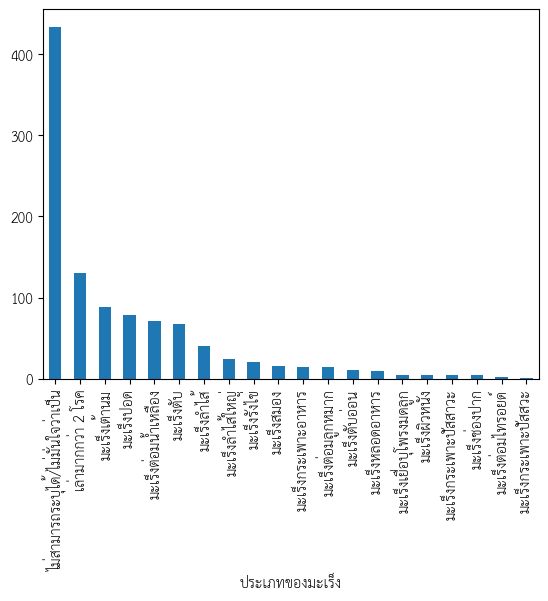

In [35]:
use_data['ประเภทของมะเร็ง'].value_counts().plot(kind='bar')

In [34]:
# # List of cancer names
# name_cancer = list(set(use_data['ประเภทของมะเร็ง']))
# # Count of cancer occurrences (dummy data for demonstration)
# cancer_counts = use_data['ประเภทของมะเร็ง'].value_counts()
# # Create bar plot
# plt.figure(figsize=(10, 8))
# plt.bar(name_cancer, cancer_counts.values, color='skyblue')  # Providing counts as y-axis data
# plt.xlabel('Cancer Types')
# plt.ylabel('Number of Cases')
# plt.title('Cancer Cases by Type')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()